### __Cats vs. Dog Dataset:  Kaggle Challenge__

In [1]:
import plaidml.keras
plaidml.keras.install_backend()
import os
os.environ["KERAS_BACKEND"]="plaidml.keras.backend"

In [4]:
#read in data
cat_dogdat = '/Users/nicksbox/Documents/Data/TensorFlow_Dev_Course/cats_and_dogs_filtered'

In [5]:
import os

In [7]:
#define directories
train_dir = os.path.join(cat_dogdat, 'train')
val_dir = os.path.join(cat_dogdat, 'validation')

In [8]:
#training data
train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')

In [9]:
#validation data
val_cats_dir = os.path.join(val_dir, 'cats')
val_dogs_dir = os.path.join(val_dir, 'dogs')

In [10]:
#check file names - sample
train_cat_fnames = os.listdir(train_cats_dir)
train_dog_fnames = os.listdir(train_dogs_dir)

print(train_cat_fnames[:10])
print(train_dog_fnames[:10])

['cat.952.jpg', 'cat.946.jpg', 'cat.6.jpg', 'cat.749.jpg', 'cat.991.jpg', 'cat.985.jpg', 'cat.775.jpg', 'cat.761.jpg', 'cat.588.jpg', 'cat.239.jpg']
['dog.775.jpg', 'dog.761.jpg', 'dog.991.jpg', 'dog.749.jpg', 'dog.985.jpg', 'dog.952.jpg', 'dog.946.jpg', 'dog.211.jpg', 'dog.577.jpg', 'dog.563.jpg']


In [12]:
#check number of each set of images
print('total training cat images:', len(os.listdir(    train_cats_dir)))
print('total training dog images:', len(os.listdir(    train_dogs_dir)))

print('total validation cat images:', len(os.listdir(  val_cats_dir)))
print('total validation dog images:', len(os.listdir(  val_dogs_dir)))

total training cat images: 1000
total training dog images: 1000
total validation cat images: 500
total validation dog images: 500


In [13]:
#view some images 
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

#set image parameters for graph as 4x4 images
nrows = 4
ncols = 4

pic_index = 0 #index for iterations

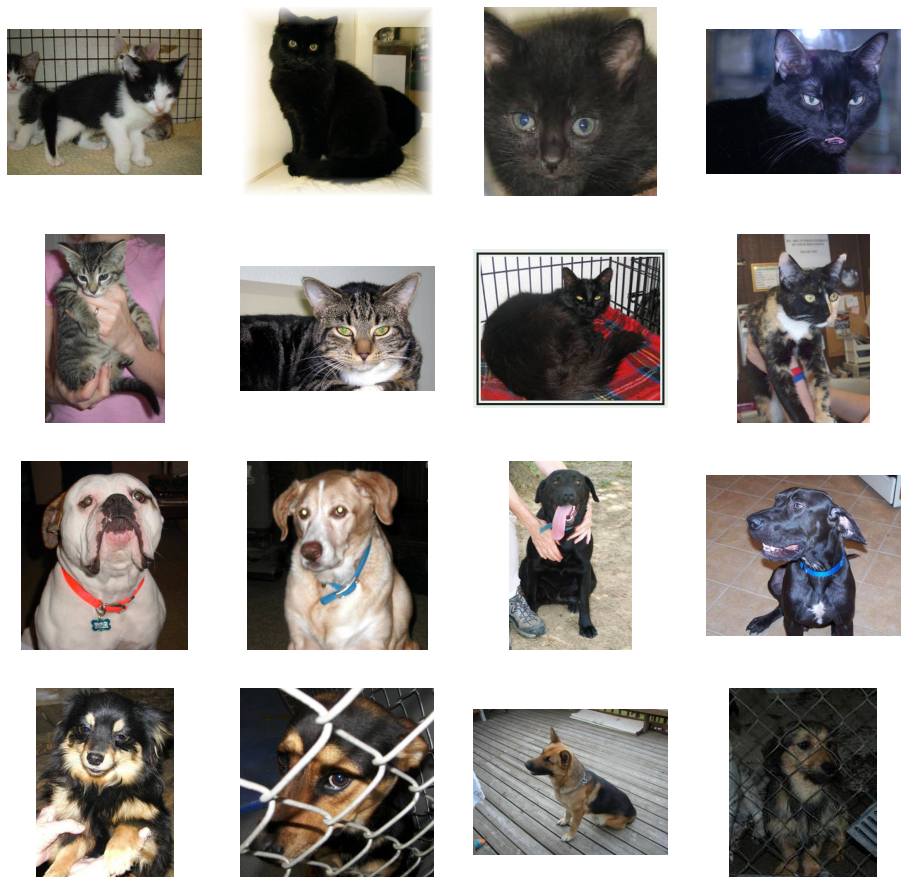

In [22]:
#show batch of 8 cat and 8 dog images
fig = plt.gcf()
fig.set_size_inches(ncols*4, nrows*4)

#pic 8 images
pic_index +=8

next_cat_pic = [os.path.join(train_cats_dir, fname)
               for fname in train_cat_fnames[pic_index-8:pic_index]]

next_dog_pic = [os.path.join(train_dogs_dir, fname)
               for fname in train_dog_fnames[pic_index-8:pic_index]]

for i, img_path in enumerate(next_cat_pic+next_dog_pic):
    sub_plt = plt.subplot(nrows, ncols, i + 1)
    sub_plt.axis('Off')
    img = mpimg.imread(img_path)
    plt.imshow(img)
plt.show()

In [18]:
#build model to train image classifier

import tensorflow as tf

In [23]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)), 
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 18496)             0

In [26]:
#compile model
from tensorflow.keras.optimizers import RMSprop
model.compile(optimizer=RMSprop(lr=0.001), loss='binary_crossentropy', metrics=['accuracy'])

In [27]:
#data processing w generators in tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#rescale images/normalize
train_datagen = ImageDataGenerator(rescale = 1/255)
test_datagen = ImageDataGenerator(rescale = 1/255)

#batch deliver 20 training images to data generator
train_generator = train_datagen.flow_from_directory(train_dir,
                                                   batch_size=20,
                                                   class_mode='binary',
                                                   target_size=(150,150))

#bath deliver 20 testing/val images to data generator
val_generator = test_datagen.flow_from_directory(val_dir,
                                                batch_size=20,
                                                class_mode='binary',
                                                target_size=(150,150))

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [29]:
#train model
history = model.fit(train_generator,
                    validation_data = val_generator,
                    steps_per_epoch=100,
                    epochs=15,
                    validation_steps=15,
                    verbose=2)

Epoch 1/15
100/100 - 13s - loss: 0.7472 - accuracy: 0.5645 - val_loss: 0.6375 - val_accuracy: 0.5800
Epoch 2/15
100/100 - 13s - loss: 0.6252 - accuracy: 0.6615 - val_loss: 0.6844 - val_accuracy: 0.5800
Epoch 3/15
100/100 - 13s - loss: 0.5512 - accuracy: 0.7250 - val_loss: 0.5780 - val_accuracy: 0.7100
Epoch 4/15
100/100 - 13s - loss: 0.4677 - accuracy: 0.7690 - val_loss: 0.6000 - val_accuracy: 0.6967
Epoch 5/15
100/100 - 13s - loss: 0.3987 - accuracy: 0.8085 - val_loss: 0.6557 - val_accuracy: 0.6700
Epoch 6/15
100/100 - 13s - loss: 0.3102 - accuracy: 0.8640 - val_loss: 0.6271 - val_accuracy: 0.7533
Epoch 7/15
100/100 - 13s - loss: 0.2367 - accuracy: 0.8940 - val_loss: 0.8978 - val_accuracy: 0.6833
Epoch 8/15
100/100 - 13s - loss: 0.1662 - accuracy: 0.9335 - val_loss: 0.9804 - val_accuracy: 0.7200
Epoch 9/15
100/100 - 13s - loss: 0.1172 - accuracy: 0.9600 - val_loss: 1.2528 - val_accuracy: 0.6533
Epoch 10/15
100/100 - 13s - loss: 0.0959 - accuracy: 0.9665 - val_loss: 1.2262 - val_accura

AxesImage(54,36;334.8x217.44) Is a cat


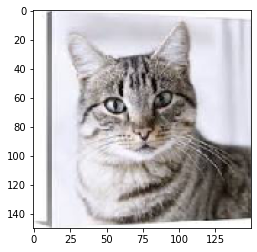

In [57]:
#make prediction
import numpy as np

from keras.preprocessing import image

x = '/Users/nicksbox/Documents/Data/TensorFlow_Dev_Course/cat_dog_pics/cat1.jpeg' 
img = image.load_img(x, target_size=(150,150))
    
x=image.img_to_array(img)
x=np.expand_dims(x, axis=0)
images = np.vstack([x])
    
classes = model.predict(x)
    
if classes[0]>0:
    print(plt.imshow(img), "Is a dog")
else:
    print(plt.imshow(img), "Is a cat")
    
